In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

## 学習

In [2]:
df = pd.read_csv('train.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,52,services,married,secondary,no,108,yes,no,unknown,15,may,543,12,-1,0,unknown,no
1,35,admin.,married,unknown,no,1055,no,no,cellular,2,mar,59,2,-1,0,unknown,no
2,37,blue-collar,married,secondary,no,32,yes,no,unknown,20,may,146,2,-1,0,unknown,no
3,57,unemployed,married,primary,no,2743,no,no,cellular,29,jan,89,1,-1,0,unknown,no
4,42,self-employed,married,tertiary,no,6383,no,no,cellular,27,aug,111,5,-1,0,unknown,no


In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

def get_features(df):
    # 特徴量として使う連続量
    features_ana = ['age', 'balance','campaign','pdays','previous']
    features_ana_val = df[features_ana].values
    # 0~1に正規化
    features_ana_val_norm = MinMaxScaler().fit_transform(features_ana_val)    
    features_ana_val_std = StandardScaler().fit_transform(features_ana_val)    
    # 特徴量として使うカテゴリ値
    features_dig = ['job', 'housing','default','marital','loan','poutcome']
    X = np.concatenate(
        [features_ana_val_std, pd.get_dummies(df[features_dig]).values],
        axis=1)
    return X

def get_label(df):
    y = df['y'].replace({'yes': 1, 'no': 0}).values
    return y

In [30]:
# 特徴量, ラベルを作成
X = get_features(df)
y = get_label(df)

/Users/takeshi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/takeshi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/takeshi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [31]:
input_dim = X.shape[1]
# 隠れ層なしのNN
model = Sequential([
    Dense(1, input_shape=(input_dim, )),
    Dense(32,activation='relu'),
    Dropout(0.1),
    Dense(32,activation='relu'),
    Dropout(0.1),
    Dense(1),
    Activation('sigmoid'),
])


In [35]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

ValueError: Unknown metric function:val_loss

In [36]:
epochs = 10
history = model.fit(X, y, epochs=epochs, batch_size=32)

Epoch 1/10
40689/40689 [==============================] - 3s 76us/step - loss: 0.3180 - acc: 0.8928
Epoch 2/10
40689/40689 [==============================] - 3s 66us/step - loss: 0.3183 - acc: 0.8929
Epoch 3/10
40689/40689 [==============================] - 3s 76us/step - loss: 0.3178 - acc: 0.8932
Epoch 4/10
40689/40689 [==============================] - 3s 70us/step - loss: 0.3177 - acc: 0.8932
Epoch 5/10
40689/40689 [==============================] - 3s 65us/step - loss: 0.3181 - acc: 0.8933
Epoch 6/10
40689/40689 [==============================] - 3s 74us/step - loss: 0.3182 - acc: 0.8930
Epoch 7/10
40689/40689 [==============================] - 3s 71us/step - loss: 0.3177 - acc: 0.8930
Epoch 8/10
40689/40689 [==============================] - 3s 78us/step - loss: 0.3178 - acc: 0.8928
Epoch 9/10
40689/40689 [==============================] - 3s 67us/step - loss: 0.3178 - acc: 0.8930
Epoch 10/10
40689/40689 [==============================] - 3s 73us/step - loss: 0.3177 - acc: 0.8930

{'loss': [0.31800717026190817, 0.3182900049217728, 0.3178109902175413, 0.31772896428819447, 0.3180659003849667, 0.318215146792278, 0.3176820951369586, 0.3178315509455211, 0.31779770093394966, 0.3177103835762246], 'acc': [0.8928457322647204, 0.8928703089316329, 0.8931652289331172, 0.8932143822698718, 0.893263535599302, 0.8930177689316425, 0.8930423456000199, 0.892821155597808, 0.8930177689301777, 0.8930423456029497]}


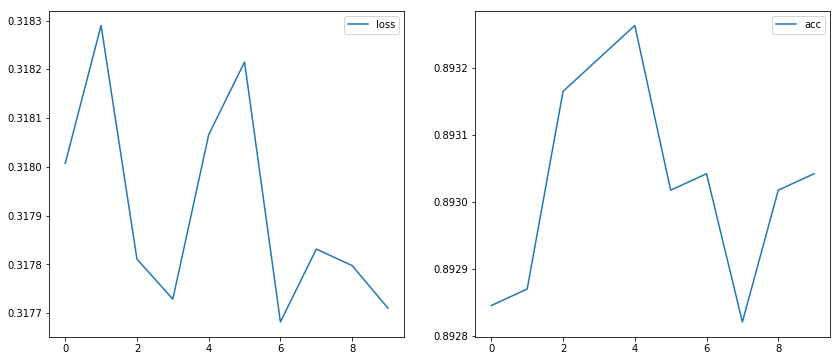

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
print(history.history)
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['acc'],label='acc')
plt.legend()

## テスト

In [18]:
test_df = pd.read_csv('test.csv')

In [38]:
test_X = get_features(test_df)
test_y = get_label(test_df)

/Users/takeshi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/takeshi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/takeshi/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [39]:
# accuracy
pred = model.predict(test_X).reshape(-1)
pred = (pred > 0.5).astype(int)

In [40]:
# test ARI (この値を報告してください)
accuracy_score(test_y, pred)

0.8881026094648385

In [20]:
'''
    # 特徴量として使う連続量
    features_ana = ['age', 'balance','day','duration','campaign','pdays','previous']
    # 特徴量として使うカテゴリ値
    features_dig = ['job', 'housing']
'''
# test ARI (この値を報告してください)
accuracy_score(test_y, pred)

0.8788146837682441

In [29]:
'''
    # 特徴量として使う連続量
    features_ana = ['age', 'balance','campaign','pdays','previous']
    # 特徴量として使うカテゴリ値
    features_dig = ['job', 'housing','default','marital','loan','poutcome']
'''
# test ARI (この値を報告してください)
accuracy_score(test_y, pred)

0.8861123396727112

In [34]:
'''
100 epoch
'''
# test ARI (この値を報告してください)
accuracy_score(test_y, pred)

0.8823529411764706

In [44]:
'''
隠れ層追加
'''
# test ARI (この値を報告してください)
accuracy_score(test_y, pred)

0.8785935426802299